
##### Student Performance Indicator
Life cycle of Machine learning Project


1. Understanding the Problem Statement,
2. Data Collection,
3. Data Checks to perform,
4. Exploratory data analysis,
5. Data Pre-Processing,
6. Model Training,
7. Choose best model,

##### 1) Problem statement

This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.
##### 2) Data Collection

Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
The data consists of 8 column and 1000 rows.

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data_df = pd.read_csv('stud_data.csv')
data_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
data_df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

In [4]:
data_df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [5]:
data_df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


##### Numerical features = 3 and catagorical = 5

#### Adding total and average cols for each student 

In [20]:
numerial_cols = ['math_score', 'reading_score', 'writing_score']
data_df['Total'] = data_df[numerial_cols].sum(axis=1)
data_df['Average'] = data_df[numerial_cols].sum(axis=1) / 3

In [21]:
data_df

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


In [22]:
data_df['Average'].describe()

count    1000.000000
mean       67.770667
std        14.257326
min         9.000000
25%        58.333333
50%        68.333333
75%        77.666667
max       100.000000
Name: Average, dtype: float64

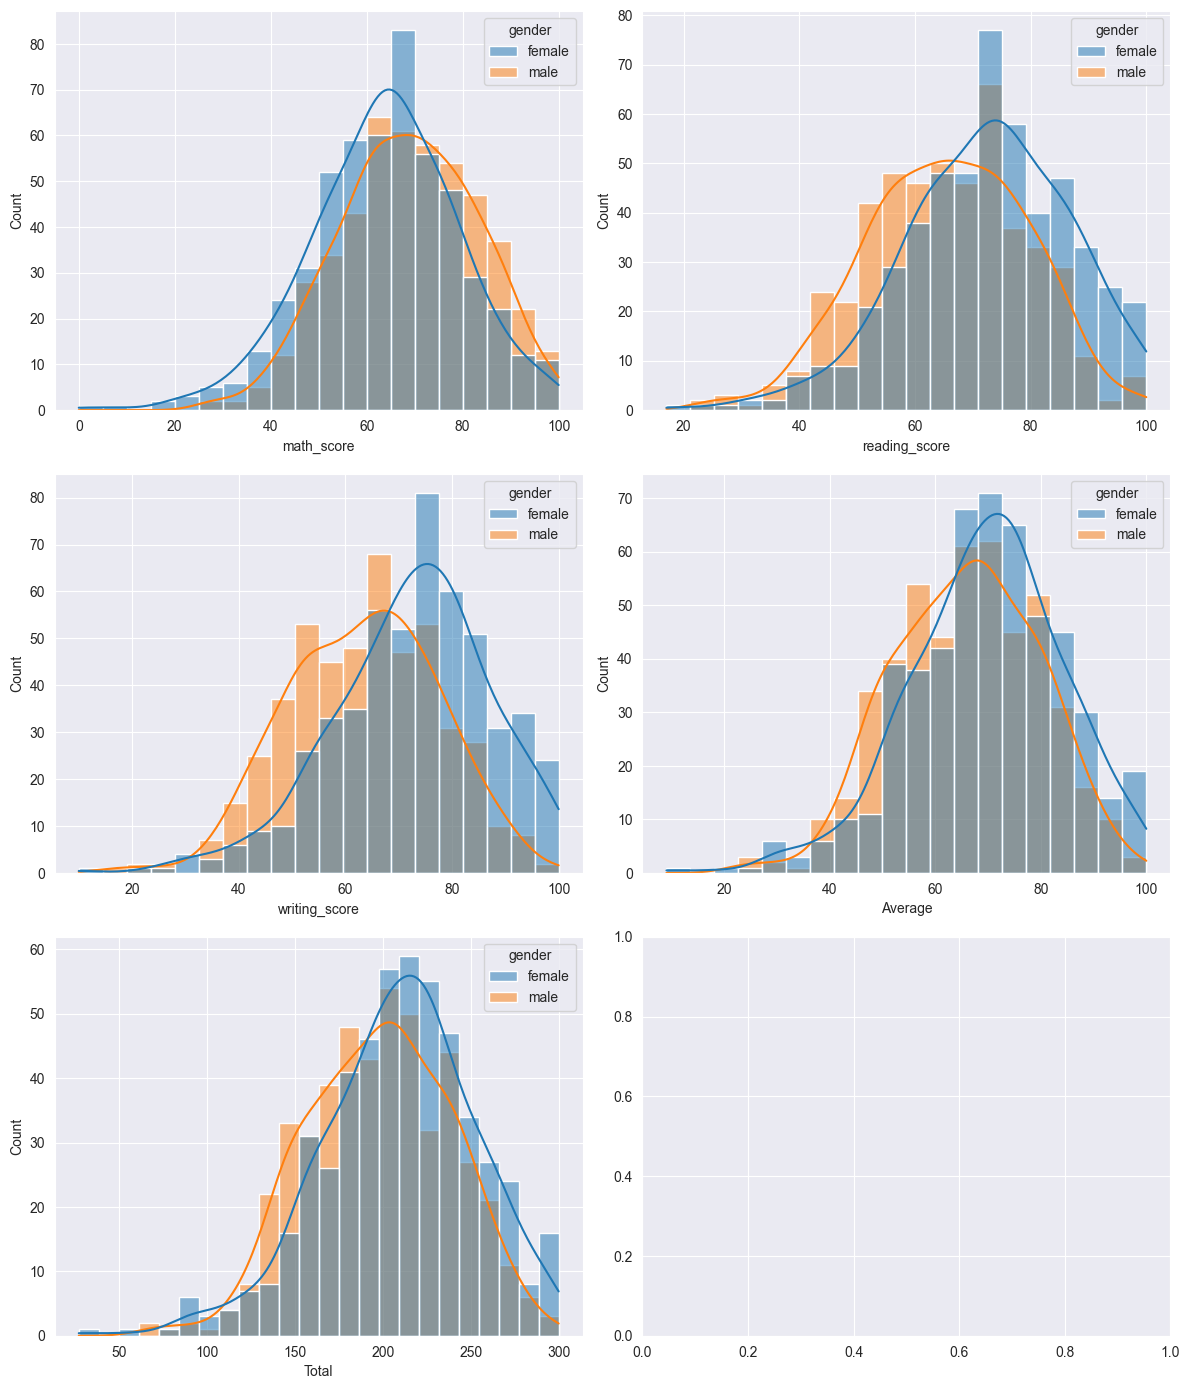

In [35]:


fig, ax = plt.subplots(3, 2, figsize=(12, 14))

sns.histplot(data=data_df, x='math_score', bins=20, ax=ax[0, 0], kde=True, hue='gender')
sns.histplot(data=data_df, x='reading_score', bins=20, ax=ax[0, 1], kde=True, hue='gender')
sns.histplot(data=data_df, x='writing_score', bins=20, ax=ax[1, 0], kde=True, hue='gender')
sns.histplot(data=data_df, x='Average', bins=20, ax=ax[1, 1], kde=True, hue='gender')
sns.histplot(data=data_df, x='Total', kde=True, ax=ax[2, 0], hue='gender')

plt.tight_layout()

plt.show()


### Female students consistently score more than male students , except for in math

<function matplotlib.pyplot.show(close=None, block=None)>

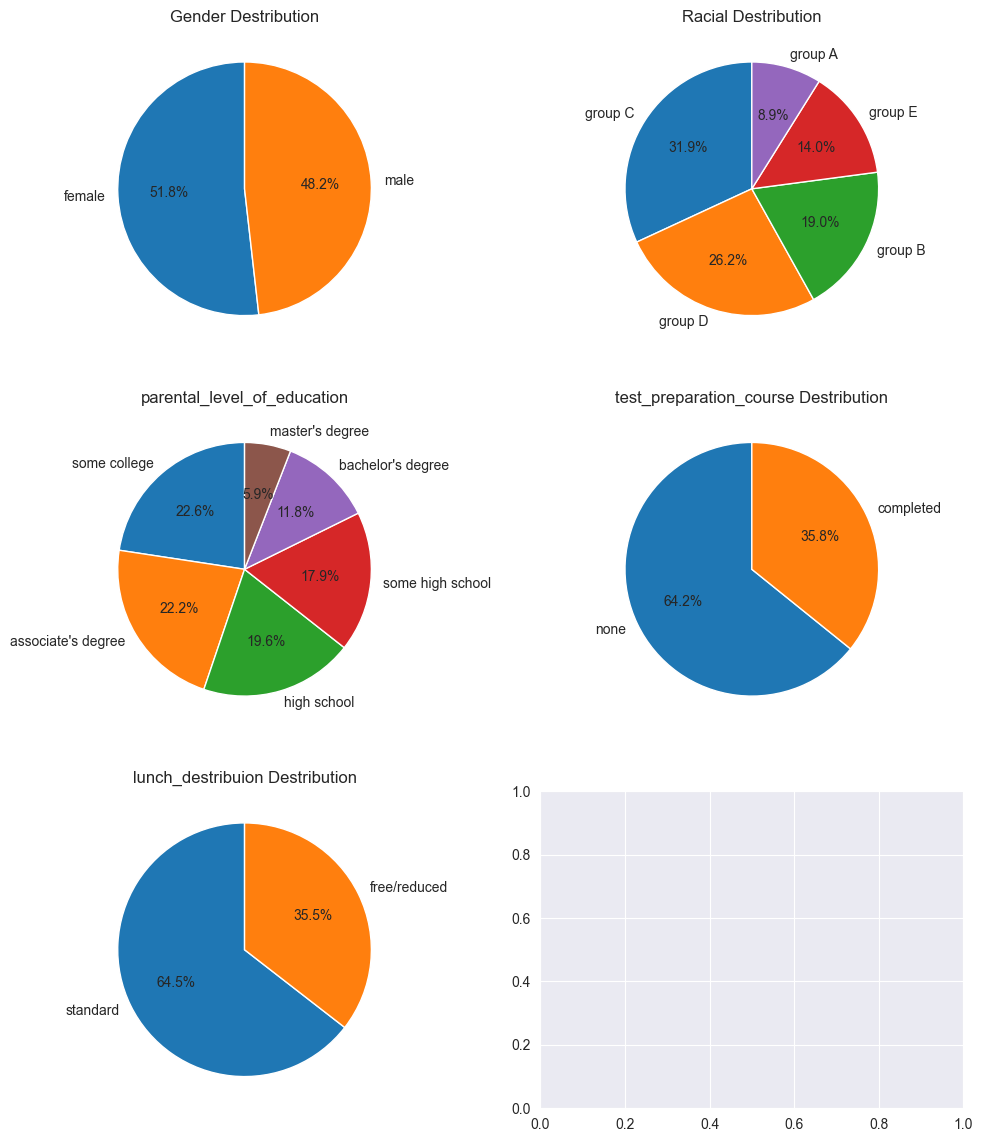

In [55]:
gender_destribution = data_df['gender'].value_counts()
racial_destribution = data_df['race_ethnicity'].value_counts()
parental_level_of_education = data_df['parental_level_of_education'].value_counts()
test_preparation_course = data_df['test_preparation_course'].value_counts()
lunch_destribuion = data_df['lunch'].value_counts()

fig, ax = plt.subplots(3, 2, figsize=(12, 14))
ax[0, 0].pie(x=gender_destribution.values,
             labels=gender_destribution.index, autopct='%1.1f%%', startangle=90)
ax[0, 0].set_title('Gender Destribution')

ax[0, 1].pie(x=racial_destribution.values,
             labels=racial_destribution.index, autopct='%1.1f%%', startangle=90)
ax[0, 1].set_title('Racial Destribution')

ax[1, 0].pie(x=parental_level_of_education.values,
             labels=parental_level_of_education.index, autopct='%1.1f%%', startangle=90)
ax[1, 0].set_title('parental_level_of_education')

ax[1, 1].pie(x=test_preparation_course.values,
             labels=test_preparation_course.index, autopct='%1.1f%%', startangle=90)
ax[1, 1].set_title('test_preparation_course Destribution')

ax[2, 0].pie(x=lunch_destribuion.values,
             labels=lunch_destribuion.index, autopct='%1.1f%%', startangle=90)
ax[2, 0].set_title('lunch_destribuion Destribution')
plt.show

<Axes: >

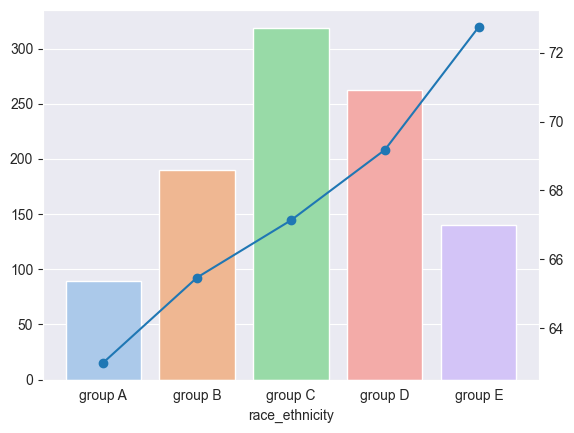

In [106]:
avg_marks_by_race = data_df.groupby(data_df['race_ethnicity'])['Average'].mean()
racial_destribution, avg_marks_by_race = racial_destribution.align(avg_marks_by_race)

ax = sns.barplot(x=racial_destribution.index, y=racial_destribution.values, palette='pastel',
                 hue=racial_destribution.index)
avg_marks_by_race.plot(kind='line', ax=ax, secondary_y=True, marker='o')

/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_17759/2134071900.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_17759/2134071900.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
/var/folders/4n/gbrmm4bs17ldvh4_ypty4z5c0000gn/T/ipykernel_17759/2134071900.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to 

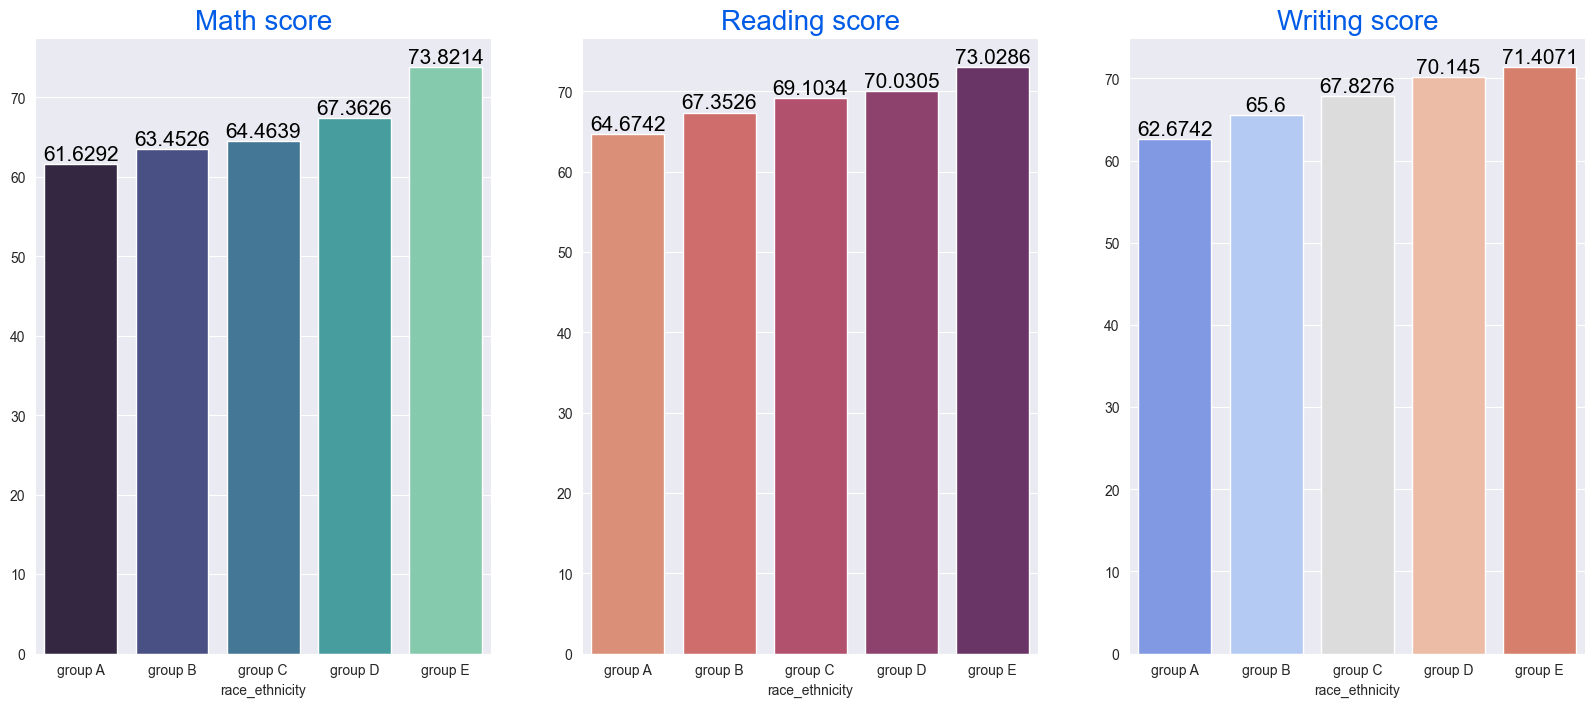

In [126]:
Group_data2 = data_df.groupby('race_ethnicity')
f, ax = plt.subplots(1, 3, figsize=(20, 8))
sns.barplot(x=Group_data2['math_score'].mean().index, y=Group_data2['math_score'].mean().values, palette='mako',
            ax=ax[0])
ax[0].set_title('Math score', color='#005ce6', size=20)

for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index, y=Group_data2['reading_score'].mean().values, palette='flare',
            ax=ax[1])
ax[1].set_title('Reading score', color='#005ce6', size=20)

for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index, y=Group_data2['writing_score'].mean().values,
            palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing score', color='#005ce6', size=20)

for container in ax[2].containers:
    ax[2].bar_label(container, color='black', size=15)

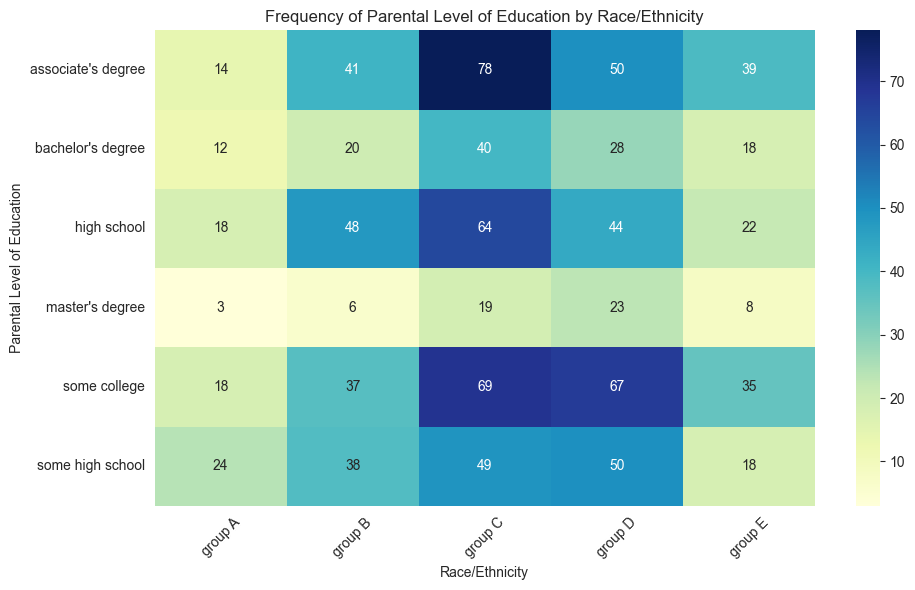

In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_df' is your DataFrame

# Create a contingency table using crosstab
degree_by_race = pd.crosstab(data_df['parental_level_of_education'], data_df['race_ethnicity'])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(degree_by_race, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Frequency of Parental Level of Education by Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Parental Level of Education')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


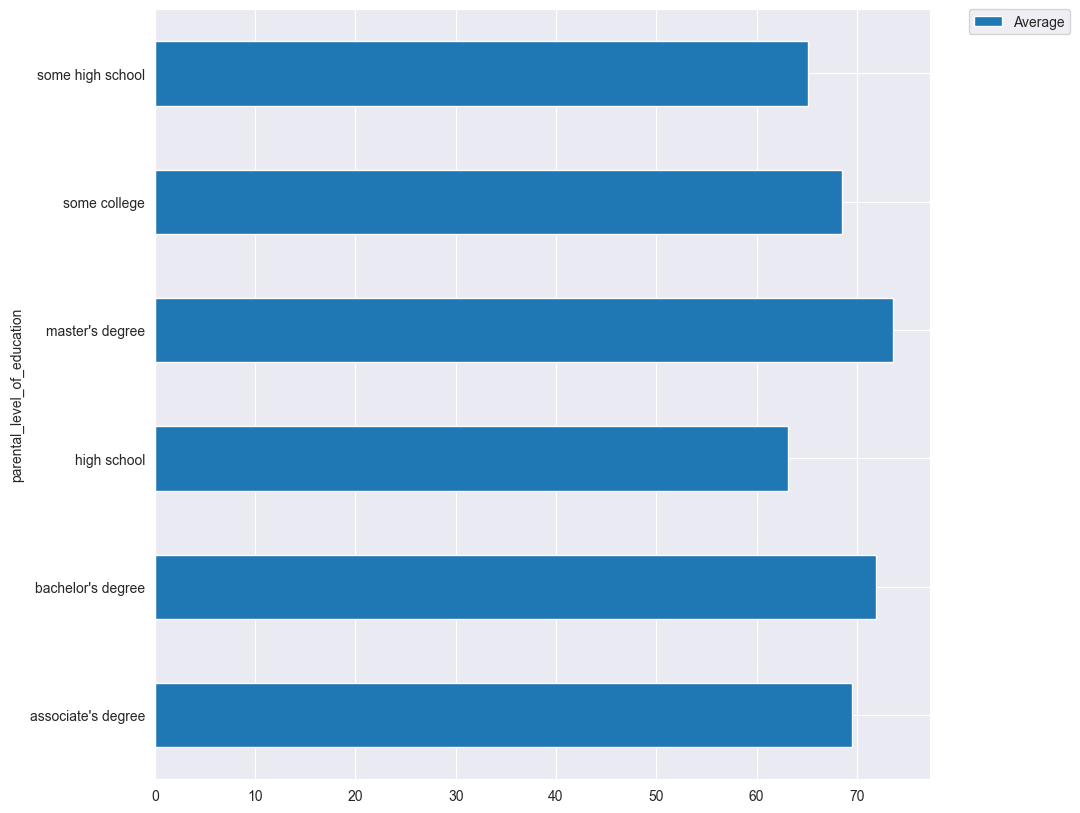

In [133]:
data_df.groupby('parental_level_of_education')['Average'].agg('mean').plot(kind='barh', figsize=(10, 10))
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

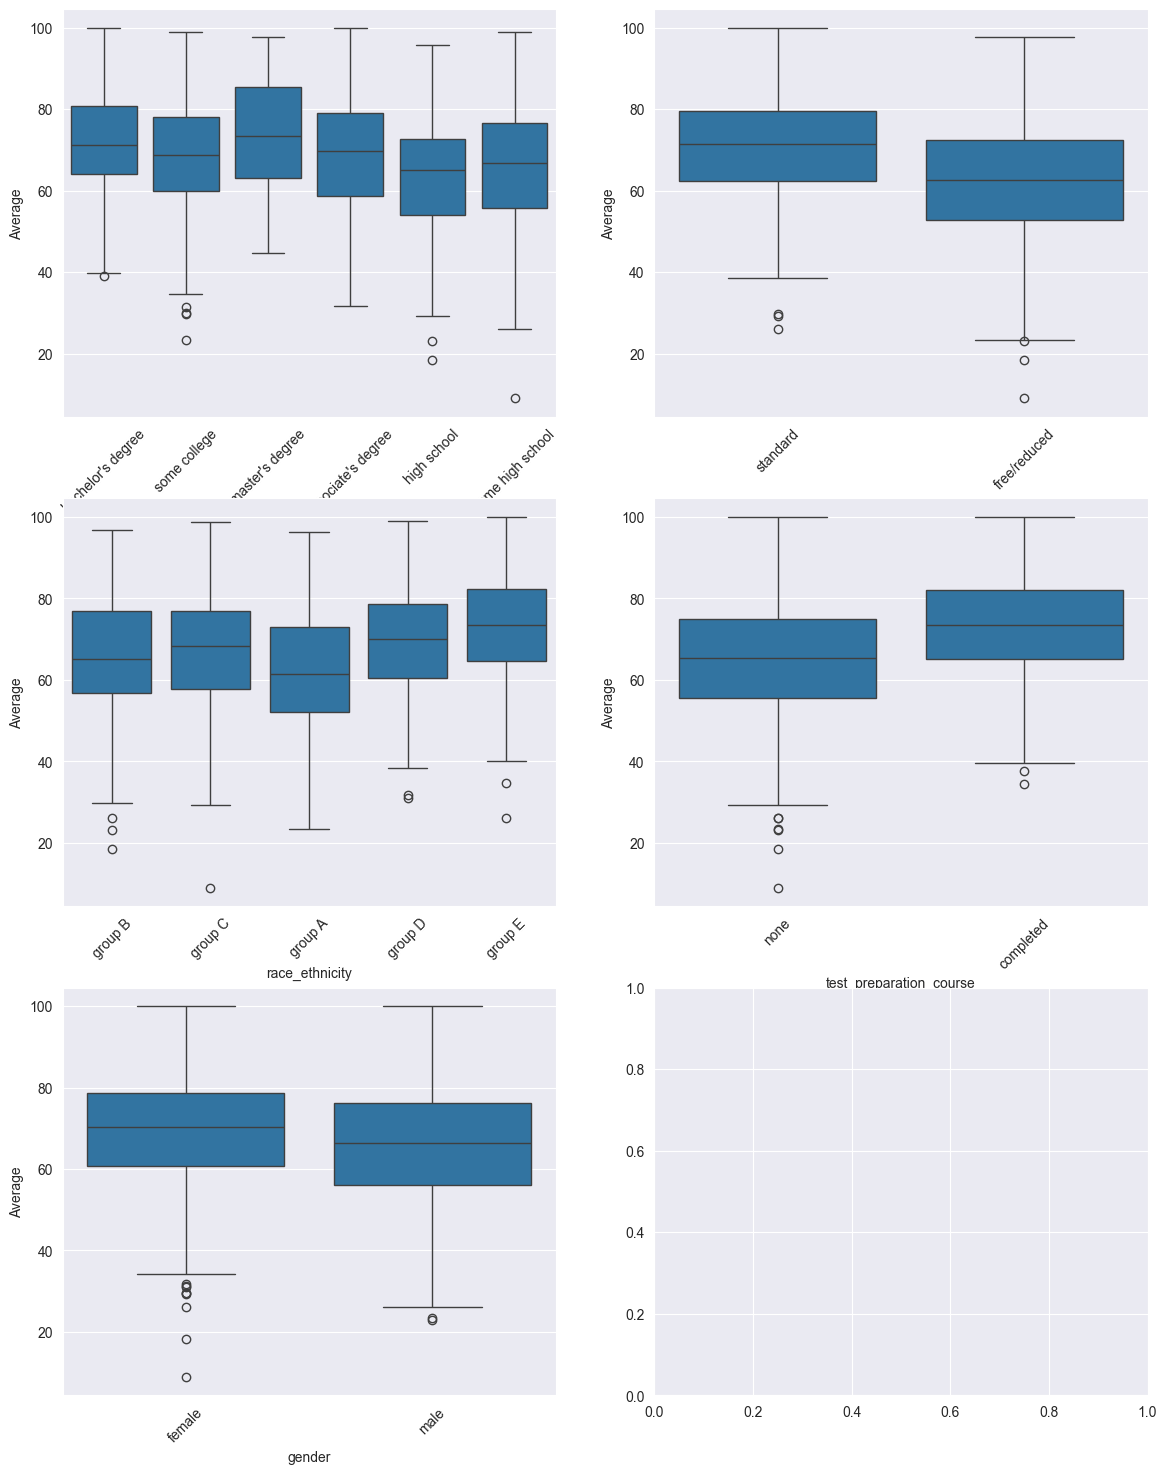

In [201]:
f,ax=plt.subplots(3,2,figsize=(14,18))
sns.boxplot(data=data_df,x='parental_level_of_education',y='Average',
            ax=ax[0, 0],native_scale=True,legend='auto'
            )
ax[0, 0].tick_params(axis='x', rotation=45)

sns.boxplot(data=data_df,x='lunch',y='Average',
            ax=ax[0, 1],native_scale=True,legend='auto'
            )
ax[0, 1].tick_params(axis='x', rotation=45)


sns.boxplot(data=data_df,x='race_ethnicity',y='Average',
            ax=ax[1, 0],native_scale=True,legend='auto'
            )
ax[1, 0].tick_params(axis='x', rotation=45)

sns.boxplot(data=data_df,x='test_preparation_course',y='Average',
            ax=ax[1, 1],native_scale=True,legend='auto'
            )
ax[1, 1].tick_params(axis='x', rotation=45)

sns.boxplot(data=data_df,x='gender',y='Average',
            ax=ax[2, 0],native_scale=True,legend='auto'
            )
ax[2, 0].tick_params(axis='x', rotation=45)


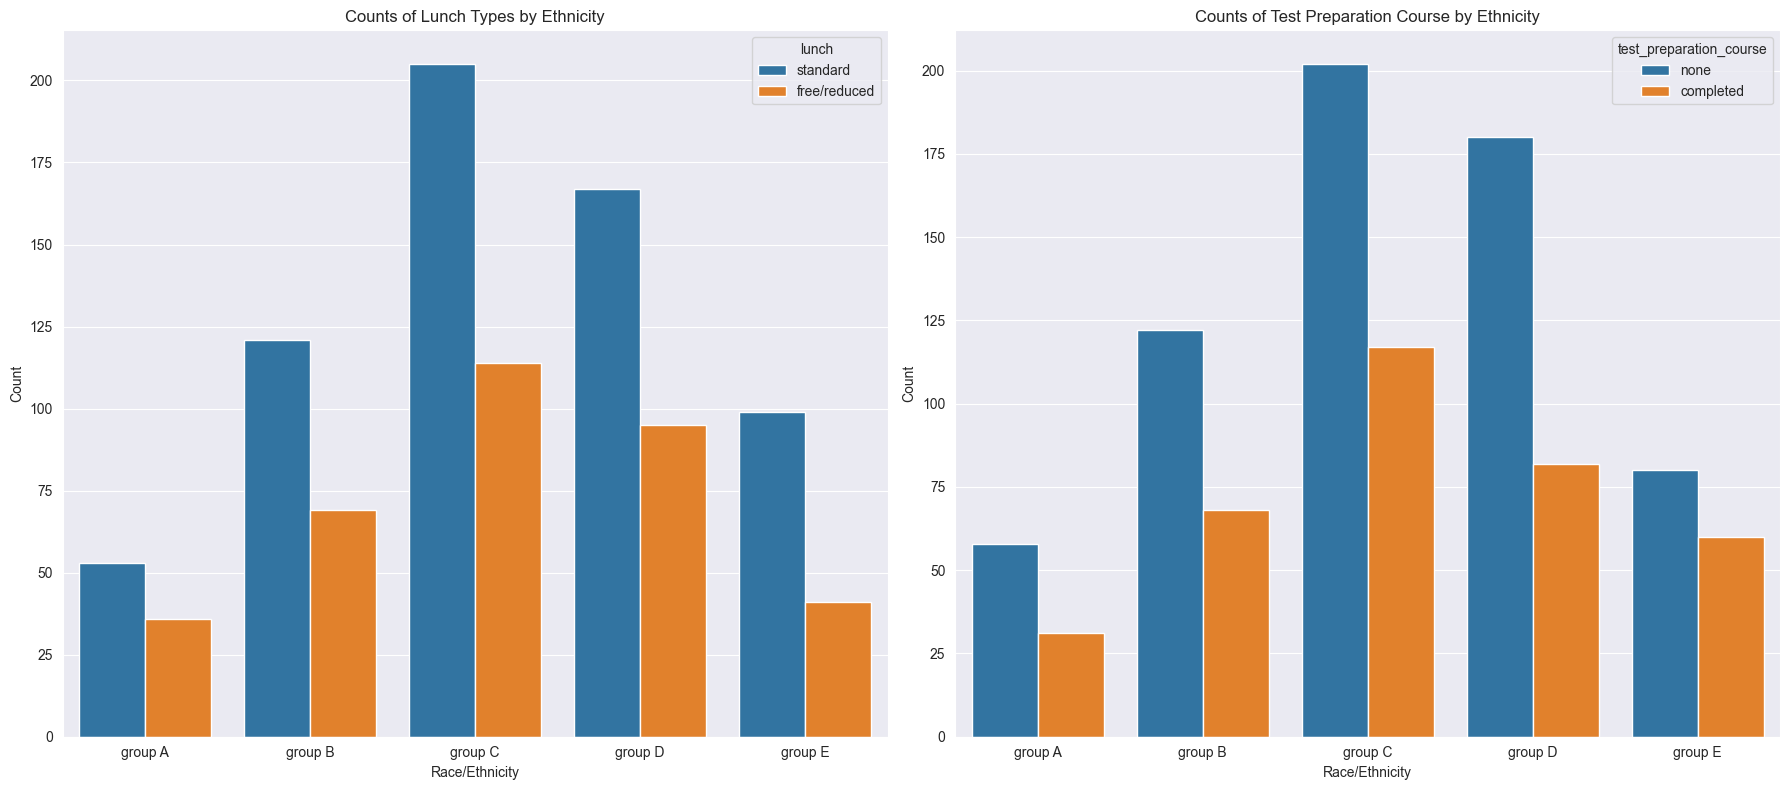

In [197]:
# Plot 1: Lunch types by ethnicity
lunch_by_ethnic = data_df.groupby('race_ethnicity')['lunch'].value_counts().reset_index(name='count')
plt.figure(figsize=(18, 8))
plt.subplot(1, 2, 1)
sns.barplot(x='race_ethnicity', y='count', hue='lunch', data=lunch_by_ethnic)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Counts of Lunch Types by Ethnicity')

# Plot 2: Test preparation course by ethnicity
preparation_by_ethnic = data_df.groupby('race_ethnicity')['test_preparation_course'].value_counts().reset_index(name='count')
plt.subplot(1, 2, 2)
sns.barplot(x='race_ethnicity', y='count', hue='test_preparation_course', data=preparation_by_ethnic)
plt.xlabel('Race/Ethnicity')
plt.ylabel('Count')
plt.title('Counts of Test Preparation Course by Ethnicity')

plt.tight_layout()
plt.show()

##### Here for group A not significant difference in count for standard and free lunch and wwe can see from boxplot that their avg score is relatively lower so maybe they are from lower economic group 

<Axes: xlabel='lunch', ylabel='writing_score'>

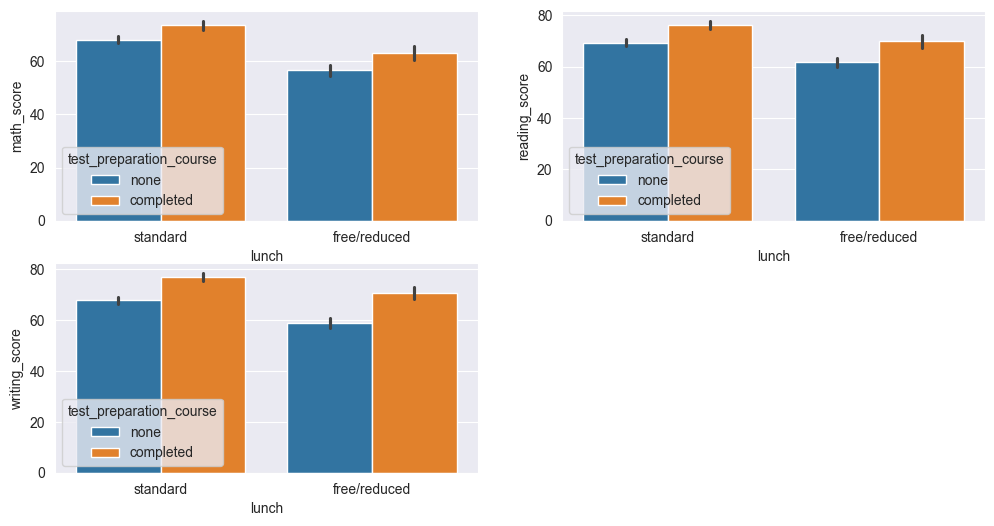

In [200]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=data_df['lunch'], y=data_df['math_score'], hue=data_df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=data_df['lunch'], y=data_df['reading_score'], hue=data_df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=data_df['lunch'], y=data_df['writing_score'], hue=data_df['test_preparation_course'])

### CONCLUSION
1. Student's Performance is related with lunch, race, parental level education
2. Females lead in pass percentage and also are top-scorers
3. Student's Performance is not much related with test preparation course
4. Finishing preparation course is benefitial